# Задача 7.4

In [1]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
file_obj = open('6.csv')
print file_obj.readline().strip()
print file_obj.readline().strip()
print file_obj.readline().strip()

lambda = 95
t_0 = 500
t = 100000


In [3]:
t_0 = 500
t = 100000

In [4]:
data = np.array([float(line.strip()) for line in file_obj])

Найдём $E(N_t|N_s)$:

$$E(N_t | N_s) = E(N_t - N_s + N_s | N_s) = E(N_t - N_s|N_s) + E(N_s|N_s)$$ 

$(N_t - N_s){\perp\!\!\!\perp}N_s \Rightarrow E(N_t - N_s|N_s)=E(N_t - N_s)$

$N_t - N_s \sim Pois(\lambda \cdot (t - s)) \Rightarrow E(N_t - N_s) = \lambda \cdot (t - s)$ 

$N_s$ - $F_{N_s}$-измеримая случайная величина, значит $E(N_s|N_s) = N_s$. Тогда

$$E(N_t | N_s) = \lambda \cdot (t - s) + N_s$$

Сопряженное распределение к экспоненциальному - $Г(\alpha, \beta)$. Тогда байесовская оценка параметра $\lambda$ - $\frac{n + \alpha}{\beta + \sum_{i=1}^n \xi_i}$, где $\xi_i$ - время между i-ым и (i + 1)-ым выходами из строя сервера, $\xi_1,...\xi_n \sim Exp(\lambda)$. 

In [5]:
xi = np.zeros(data.size)
xi[1:] = data[:data.size - 1]
xi = data - xi

Подберём параметры сопряженного распределения, для этого рассмотрим график плотности гамма распределения:

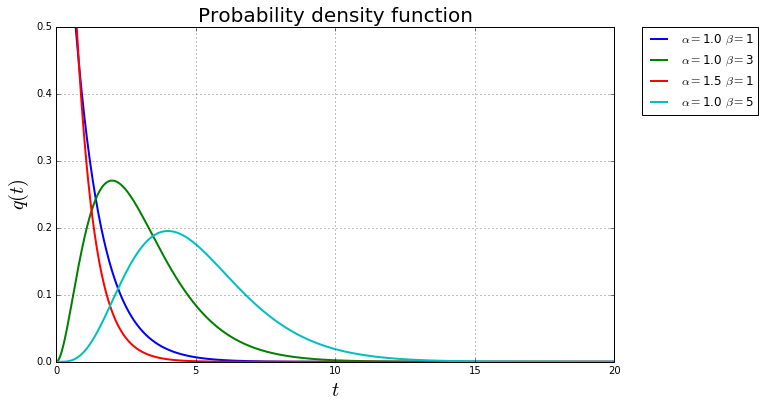

In [21]:
x = np.linspace(0, 20, 1000)

_alpha = np.array([1, 1, 1.5, 1])
_beta = np.array([1, 3, 1, 5])

plt.figure(figsize=(10, 6))

for i in range(4):
    plt.plot(x, sps.gamma.pdf(x, a=_beta[i], scale=1/_alpha[i]), linewidth = 2, label = r'$\alpha = $' + str(_alpha[i]) + 
             r' $\beta = $' + str(_beta[i]))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim(0, 20)
plt.ylim(0, 0.5)
plt.xlabel('$t$', fontsize = 20)
plt.ylabel('$q(t)$', fontsize = 20)
plt.title('Probability density function', fontsize = 20)
plt.grid() 
plt.show()

Из графиков плотности гамма распределения видно, что при $\beta > 1$ максимальная плотность при $t > 0$, значит, так как нет никаких данных о $\lambda$, нужно взять параметр априорного распределения $\beta = 1$. От параметра $\alpha$ зависит то, как график прижимается к вертикальной оси. Считаем, что скорее всего значение $\lambda$ - в районе 0. Тогда положим $\alpha = 1$:

In [22]:
alpha = 1
beta = 1

In [26]:
s = np.arange(0, t + t_0, t_0)
N_s = np.array([(data <= cur_t).sum(0) for cur_t in s])
lambda_ = np.zeros(N_s.size)
xi = xi.cumsum()
for i in range(N_s.size):
    lambda_[i] = (N_s[i] + alpha) / (xi[N_s[i] - 1] + beta)
result = lambda_ * (t - s) + N_s

Вывод программы, предсказывающей сколько серверов нужно докупить к моменту времени t:

In [19]:
for i in range(s.size):
    print r'time = %d: %d' % (s[i], result[i])

time = 0: 1
time = 500: 952
time = 1000: 1330
time = 1500: 1331
time = 2000: 1349
time = 2500: 1255
time = 3000: 1173
time = 3500: 1120
time = 4000: 1087
time = 4500: 1119
time = 5000: 1177
time = 5500: 1176
time = 6000: 1112
time = 6500: 1090
time = 7000: 1032
time = 7500: 1026
time = 8000: 1037
time = 8500: 1038
time = 9000: 1104
time = 9500: 1092
time = 10000: 1106
time = 10500: 1114
time = 11000: 1116
time = 11500: 1129
time = 12000: 1110
time = 12500: 1103
time = 13000: 1091
time = 13500: 1116
time = 14000: 1137
time = 14500: 1135
time = 15000: 1148
time = 15500: 1140
time = 16000: 1145
time = 16500: 1136
time = 17000: 1129
time = 17500: 1133
time = 18000: 1091
time = 18500: 1089
time = 19000: 1087
time = 19500: 1093
time = 20000: 1093
time = 20500: 1095
time = 21000: 1109
time = 21500: 1110
time = 22000: 1110
time = 22500: 1119
time = 23000: 1128
time = 23500: 1129
time = 24000: 1126
time = 24500: 1119
time = 25000: 1117
time = 25500: 1110
time = 26000: 1107
time = 26500: 1108
ti